# Проект: классификация

__Бизнес-задача:__ определить характеристики, по которым можно выявить клиентов, более склонных к открытию депозита в банке, и за счёт этого повысить результативность маркетинговой кампании.

__Техническая задача__ для вас как для специалиста в Data Science: построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать, __воспользуется он предложением об открытии депозита или нет.__

## Данные о клиентах банка:

+ age (возраст);
+ job (сфера занятости);
+ marital (семейное положение);
+ education (уровень образования);
+ default (имеется ли просроченный кредит);
+ housing (имеется ли кредит на жильё);
+ loan (имеется ли кредит на личные нужды);
+ balance (баланс).

## Данные, связанные с последним контактом в контексте текущей маркетинговой кампании:

+ contact (тип контакта с клиентом);
+ month (месяц, в котором был последний контакт);
+ day (день, в который был последний контакт);
+ duration (продолжительность контакта в секундах).

## Прочие признаки:

+ campaign (количество контактов с этим клиентом в течение текущей кампании);
+ pdays (количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании);
+ previous (количество контактов до текущей кампании)
+ poutcome (результат прошлой маркетинговой кампании).

И, разумеется, наша целевая переменная 
+ deposit, которая определяет, согласится ли клиент открыть депозит в банке. Именно её мы будем пытаться предсказать в данном кейсе.

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif
import plotly.express as px

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [139]:
df = pd.read_csv('data/bank_fin.zip', sep = ';', compression='zip')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

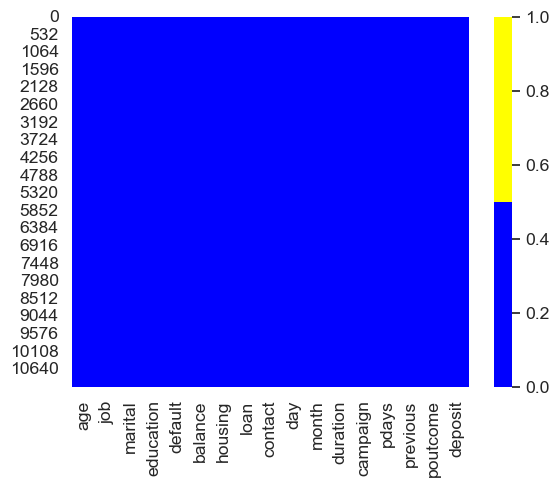

In [140]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
# ваш код
# проверяем наличие пропусков
df.info()
colors = ['blue', 'yellow'] 
ax = sns.heatmap(
    df.isnull(),
    cmap=sns.color_palette(colors),
)
df.isnull().sum()

### Задание 2

In [141]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
# ваш код
df.job.value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

### Задание 3

In [142]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
df['balance']=df['balance'].apply(lambda x: float(str(x).replace(' ','').replace('$','').replace(',','.')))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  int64  
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11137 non-null  float64
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


In [143]:
df.balance.mean()

1529.1290293615875

### Задание 4

In [144]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
# ваш код
df['balance'].fillna(df['balance'].median(), inplace=True)
df.balance.mean()

1526.9360329690019

### Задание 5

In [145]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
# ваш код
df.education=df.education.apply(lambda x: df.education.mode()[0] if x=='unknown' else x)
df.job=df.job.apply(lambda x: df.job.mode()[0] if x=='unknown' else x)

Задание 2.5

После замены пропусков рассчитайте средний баланс для клиентов с самой популярной работой и самым популярным уровнем образования (т. е. для тех, у кого одновременно самая популярная работа и самое популярное образование). Ответ округлите до трёх знаков после точки-разделителя.

In [146]:
df[(df['job'] == 'management') & (df['education'] == 'secondary')]['balance'].mean()

1598.8829787234042

Задание 2.6

Введите верхнюю и нижнюю границы поиска выбросов по методу Тьюки, округлив их до целых чисел.

In [147]:
# Квантили вычисляются с помощью метода quantile(). Потенциальные выбросы определяются при помощи фильтрации данных по 
# условию выхода за пределы верхней или нижней границы.
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<=lower_bound) | (x >= upper_bound)]
    cleaned = data[(x>=lower_bound) & (x <= upper_bound)]
    return outliers, cleaned, lower_bound, upper_bound

In [148]:
df_out, df_clean, l_bound, u_bound = outliers_iqr(df, 'balance')

In [149]:
print(('нижняя граница {} , верхняя граница {}').format(l_bound, u_bound))
print('количество строк в очищенных данных {}'.format(df_clean.shape[0]))

нижняя граница -2241.0 , верхняя граница 4063.0
количество строк в очищенных данных 10105


In [150]:
df =  df_clean.reset_index()

### Задание 6

In [151]:
# удалите все выбросы для признака balance
# ваш код кусок из функции выше.
# outliers = data[(x<=lower_bound) | (x >= upper_bound)]


## Часть 2:  Разведывательный анализ

### Задание 1

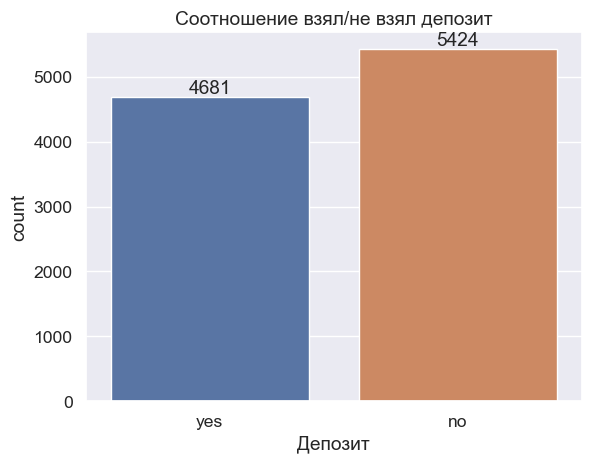

In [152]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# ваш код
ax = sns.countplot(x='deposit', data=df)
ax.bar_label(ax.containers[0])
plt.xlabel('Депозит')
plt.title('Соотношение взял/не взял депозит')
plt.show()



In [153]:
# заменим категориальные значения в признаке депозит на числовой и удалим index
df['deposit'] = df['deposit'].apply(lambda x: 1 if x=='yes' else 0)
df = df.drop('index', axis=1)
# числовые и категориальные признаки
num_cols = [s for s in df.columns if df[s].dtypes != 'object']
cat_cols = [s for s in df.columns if df[s].dtypes == 'object']

### вывод : соотношение классов близко к сбалансированному

### Задания 2 и 3

In [154]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
#ваш код
df.describe()

,age,balance,day,duration,campaign,pdays,previous,deposit
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230,0.463236
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795,0.498671
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000,1.000000


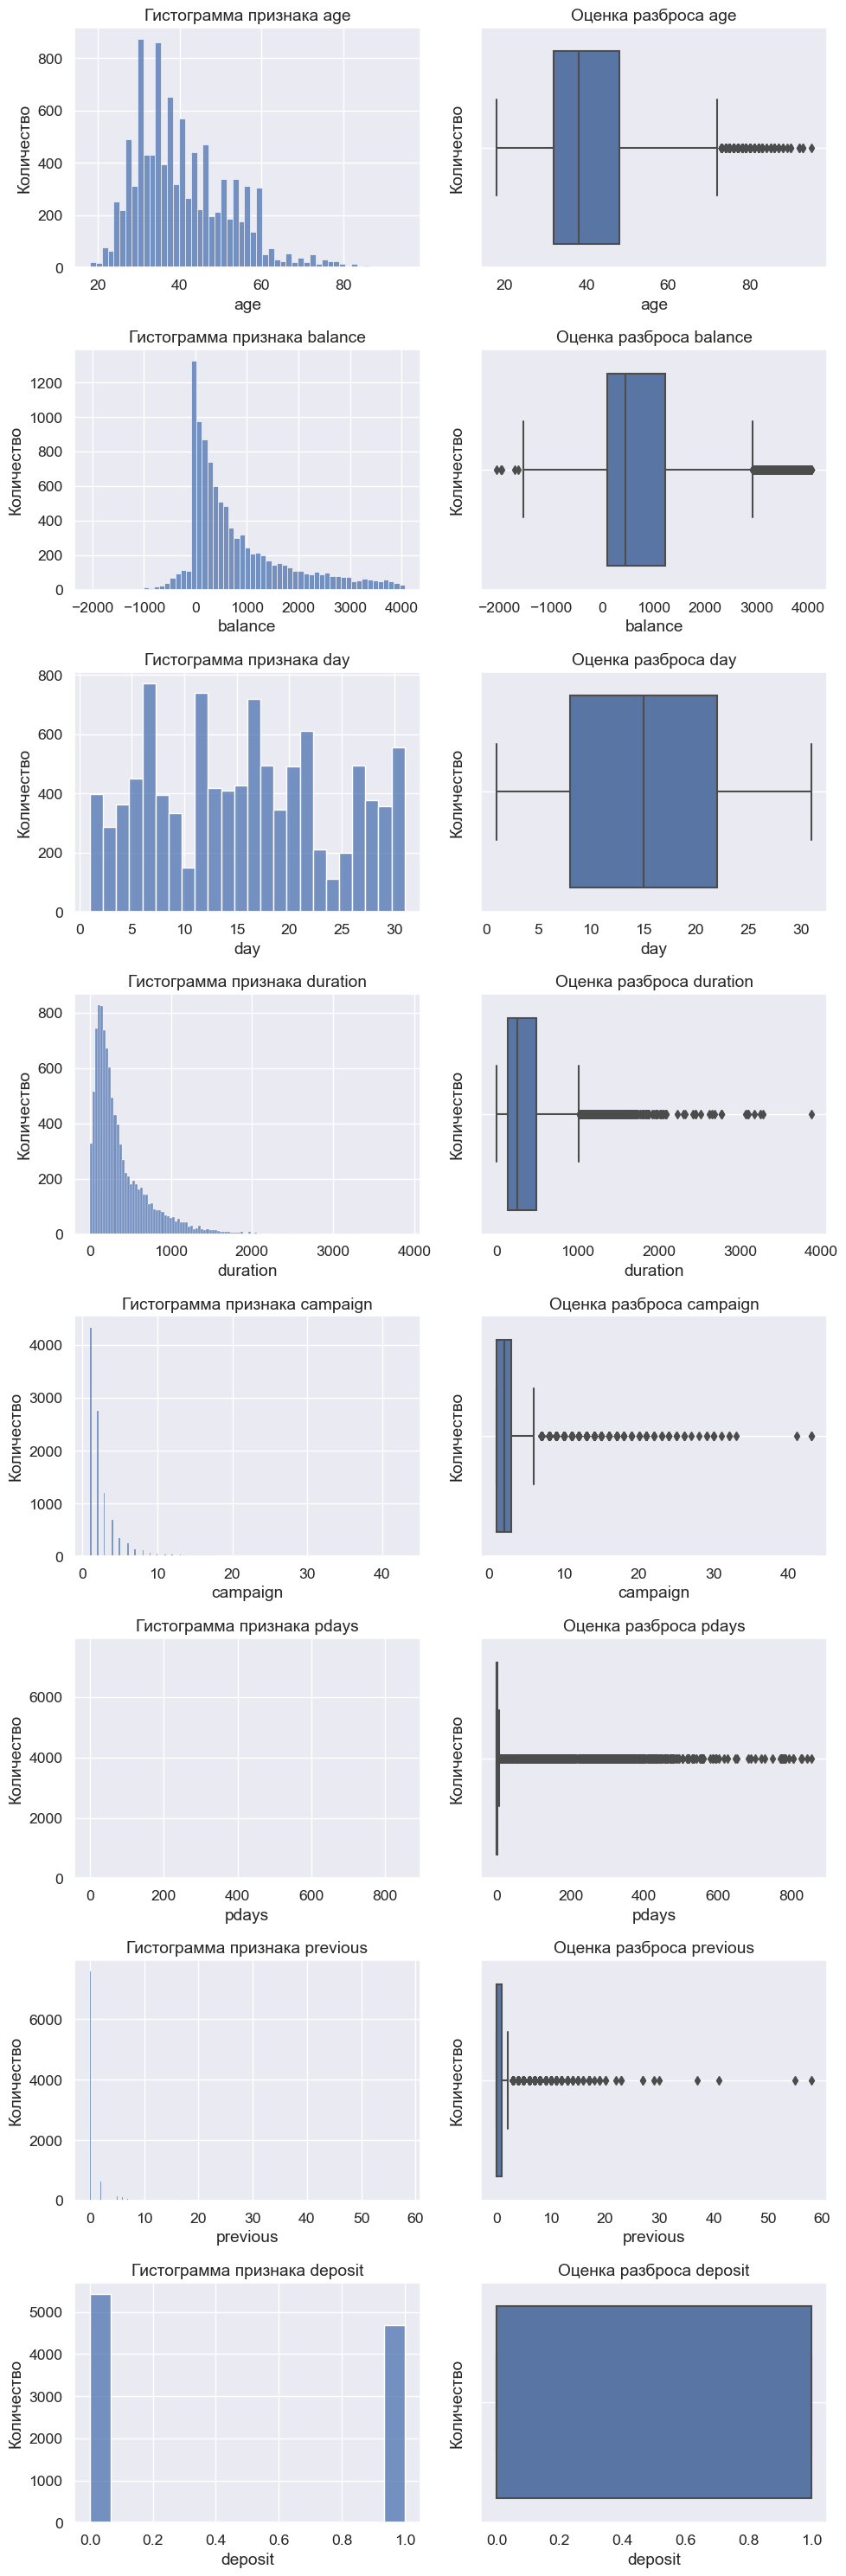

In [155]:
# имеем восемь числовых признаков. 
# рассмотрим распределени признаков для тех кто открыл депозит
n = len(num_cols) #число признаков
fig, axes = plt.subplots(n, 2, figsize=(10, 30)) #фигура+n*2 координатных плоскостей
#Создаём цикл для всех признаков из списка числовых признаков
for i, feature in enumerate(num_cols):
    hist = sns.histplot(data=df, x=feature, ax=axes[i][0] )
    hist.set_title('Гистограмма признака ' + feature)
    hist.set_xlabel(feature);
    hist.set_ylabel('Количество');
    boxplot = sns.boxplot(df, x=feature, orient='h', ax=axes[i][1])
    boxplot.set_title('Оценка разброса '+ feature);
    boxplot.set_xlabel(feature);
    boxplot.set_ylabel('Количество');
    boxplot.grid()
    plt.tight_layout() #выравнивание графиков

In [156]:
df[df['deposit']==1].describe()

,age,balance,day,duration,campaign,pdays,previous,deposit
count,4681.000000,4681.000000,4681.000000,4681.000000,4681.000000,4681.000000,4681.000000,4681.0
mean,41.203162,953.071566,15.073489,539.568896,2.136296,68.776757,1.157018,1.0
std,13.291117,1040.543075,8.503427,394.408498,1.921040,119.854999,2.542359,0.0
min,18.000000,-1944.000000,1.000000,8.000000,1.000000,-1.000000,0.000000,1.0
25%,31.000000,163.000000,8.000000,245.000000,1.000000,-1.000000,0.000000,1.0
50%,38.000000,569.000000,15.000000,429.000000,2.000000,-1.000000,0.000000,1.0
75%,49.000000,1495.000000,21.000000,727.000000,2.000000,98.000000,1.000000,1.0
max,95.000000,4060.000000,31.000000,3881.000000,32.000000,854.000000,58.000000,1.0


In [157]:
df[df['deposit']==0].describe()

,age,balance,day,duration,campaign,pdays,previous,deposit
count,5424.000000,5424.00000,5424.000000,5424.000000,5424.000000,5424.000000,5424.000000,5424.0
mean,40.629978,682.15542,16.036320,221.316740,2.845870,36.253872,0.522124,0.0
std,10.196686,934.37434,8.362851,206.688801,3.199471,97.527835,1.901471,0.0
min,18.000000,-2049.00000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.0
25%,33.000000,46.00000,8.000000,93.000000,1.000000,-1.000000,0.000000,0.0
50%,39.000000,342.00000,16.000000,163.000000,2.000000,-1.000000,0.000000,0.0
75%,48.000000,992.00000,22.000000,278.000000,3.000000,-1.000000,0.000000,0.0
max,89.000000,4063.00000,31.000000,3284.000000,43.000000,826.000000,41.000000,0.0


Выводы: 
+ 50 процентов это клиенты от 32 до 48 лет. 
+ 50 процентов имеют баланс от 95 до 1200 долларов. у тех кто не берет депозит баланс ниже.
+ большая часть общения составляет в среднем 200-500 секунд. те кто берут депозит общаются дольше. 
+ количество компаний в среднем 2, но если не взяли депозит за две компании, далее шанс снижается, что возьмут
+ день когда был последний контакт в основном разспределен равномерно.


Задание 3.1
Сколько клиентов открыли депозит?

In [158]:
df.deposit.sum()

4681

Задание 3.2

Каков максимальный возраст клиента банка?

In [159]:
#df.age.describe()
df.age.max()

95

Задание 3.3

Какова минимальная продолжительность разговора с клиентом банка? Ответ дайте в количестве секунд.

In [160]:
df.duration.min()

2

### Задания 4 и 5

In [161]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты

In [162]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,1


### Задание 6

In [163]:
def show_df(df,  ftr, column_split,val='day', title_name=''):
    df=df.pivot_table(
    values=val,
    index=ftr,    
    columns=column_split,
    aggfunc='count').reset_index()
    fig = px.bar(df,x=ftr, y=[0,1],
             orientation='v',
             text_auto=True,
             barmode='group',
             title=title_name,
             hover_name=ftr,
             color_discrete_sequence=["orange", "green", "blue", "purple"]
            )
    fig.show('png')

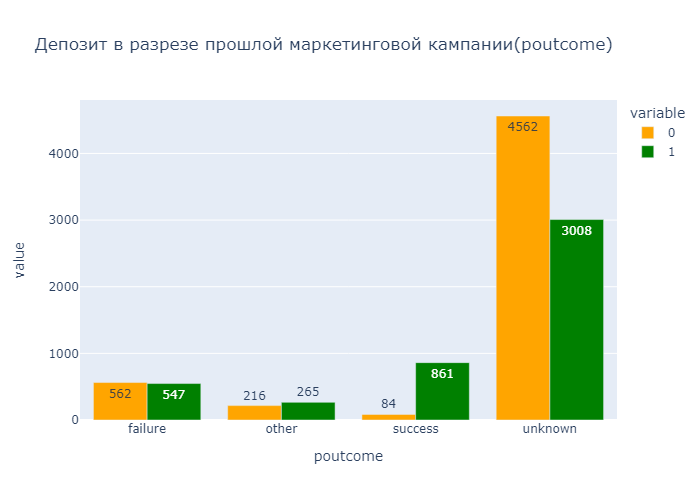

In [164]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# ваш код
show_df(df, 'poutcome', 'deposit', title_name='Депозит в разрезе прошлой маркетинговой кампании(poutcome)')
# для success, те кто брал депозит в предыдущей компании взял и в текущей.


### Задание 7

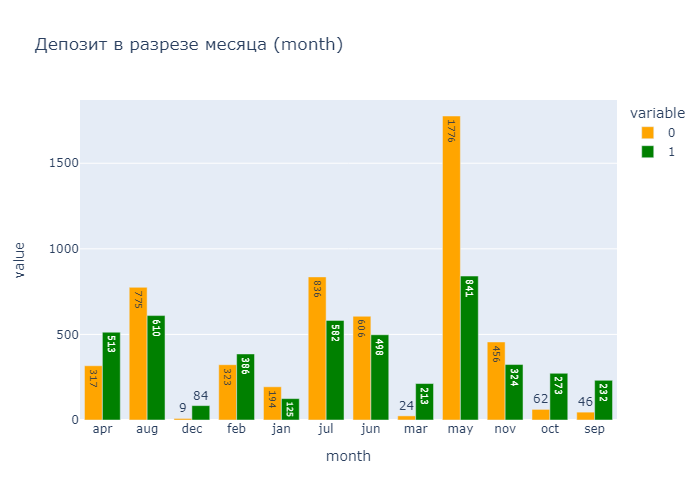

In [165]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# ваш код
show_df(df, 'month', 'deposit', title_name='Депозит в разрезе месяца (month)')
# в мае больше всего отказов

### Задание 8

In [166]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
def age_grp(age):
    if age < 30:
        age_group = '<30'
    elif 30 <= age < 40:
        age_group = '30-40'
    elif 40 <= age < 50:
        age_group = '40-50'
    elif 50 <= age < 60:
        age_group = '50-60'
    else:
        age_group = '60+'
    return age_group

df['age_group'] = df['age'].apply(age_grp)

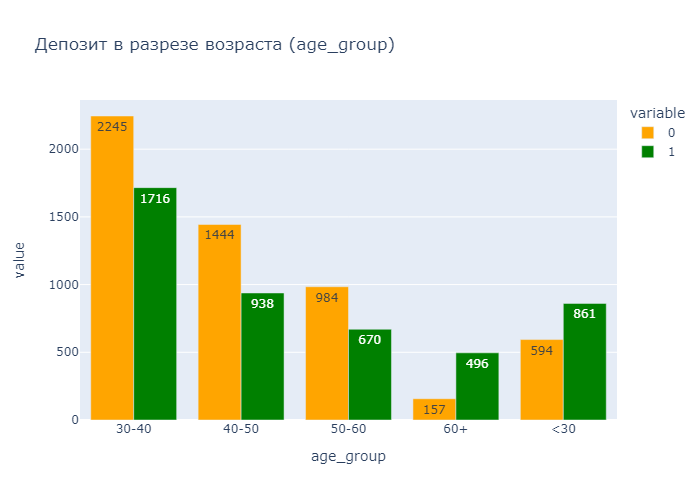

In [167]:
show_df(df, 'age_group', 'deposit', title_name='Депозит в разрезе возраста (age_group)')

In [168]:
df_g=df.pivot_table(
    values='day',
    index='age_group',    
    columns='deposit',
    aggfunc='count').reset_index()

In [169]:
df_g['succses_to_open'] = df_g[1] / (df_g[0] + df_g[1]) * 100

In [170]:
df_g.sort_values(by = ['succses_to_open'], ascending=False)[0:2]

deposit,age_group,0,1,succses_to_open
3,60+,157,496,75.957121
4,<30,594,861,59.175258


### Задания 9 и 10

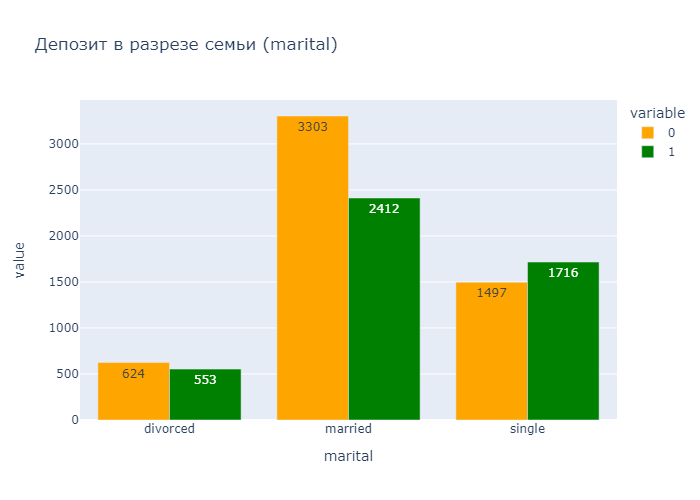

In [171]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
show_df(df, 'marital', 'deposit', title_name='Депозит в разрезе семьи (marital)')

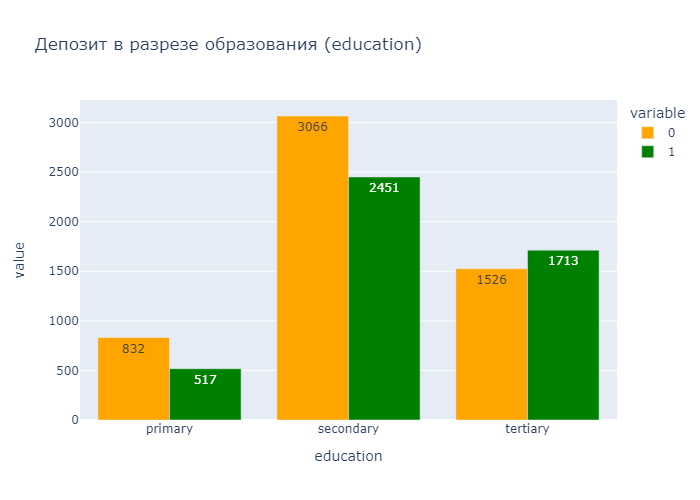

In [172]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
show_df(df, 'education', 'deposit', title_name='Депозит в разрезе образования (education)')

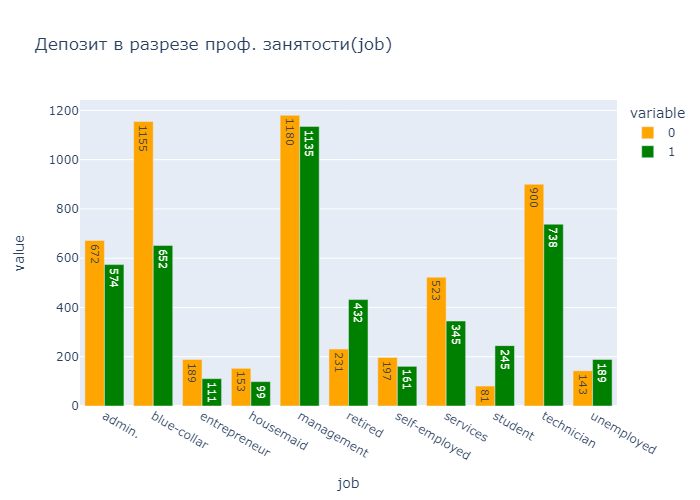

In [173]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
show_df(df, 'job', 'deposit', title_name='Депозит в разрезе проф. занятости(job)')

Задание 3.9

В какой сфере занято наибольшее число клиентов банка?

In [174]:
df.groupby(['job'])['job'].agg('count').sort_values(ascending=False)

job
management       2315
blue-collar      1807
technician       1638
admin.           1246
services          868
retired           663
self-employed     358
unemployed        332
student           326
entrepreneur      300
housemaid         252
Name: job, dtype: int64

Задание 3.10

При каком семейном положении есть тенденция открывать депозит, а не отказываться от его открытия?

In [175]:
df_g=df.pivot_table(
    values='day',
    index='marital',    
    columns='deposit',
    aggfunc='count').reset_index()
df_g['succses_to_open'] = df_g[1] / (df_g[0] + df_g[1]) * 100
df_g

deposit,marital,0,1,succses_to_open
0,divorced,624,553,46.983857
1,married,3303,2412,42.204724
2,single,1497,1716,53.408030


### Задание 11

In [176]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)
df[df['deposit']==1].groupby(['education','marital'])['deposit'].count().sort_values(ascending=False)

education  marital 
secondary  married     1289
           single       879
tertiary   married      784
           single       755
primary    married      339
secondary  divorced     283
tertiary   divorced     174
primary    divorced      96
           single        82
Name: deposit, dtype: int64

В предыдущих заданиях мы посмотрели различные категории отдельно. Но что будет, если посмотреть на пересечения категорий? Каких людей среди открывших депозит больше: одиноких с высшим образованием или разведённых с более низким уровнем образования?

Разделите таблицу на две части: для тех, кто открыл депозит, и для тех, кто не открыл. Для каждой части постройте сводную диаграмму по уровню образования и семейному положению. Представьте результаты в виде тепловых карт. Различаются ли наиболее популярные группы для открывших депозит и для неоткрывших? Какой вывод вы можете сделать, исходя из полученных данных?

In [177]:
# открыли депозит
df_d1 = df[df['deposit']==1]
# депозит не открыт
df_d0 = df[df['deposit']==0]


In [178]:
df_d1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,1,50-60
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,1,50-60
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,1,40-50
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,1,50-60
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,1,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4676,78,retired,divorced,primary,no,1389.0,no,no,cellular,8,apr,335,1,-1,0,unknown,1,60+
4677,30,management,single,tertiary,no,398.0,no,no,cellular,27,oct,102,1,180,3,success,1,30-40
4678,69,retired,divorced,tertiary,no,247.0,no,no,cellular,22,apr,138,2,-1,0,unknown,1,60+
4679,48,entrepreneur,married,secondary,no,0.0,no,yes,cellular,28,jul,431,2,-1,0,unknown,1,40-50


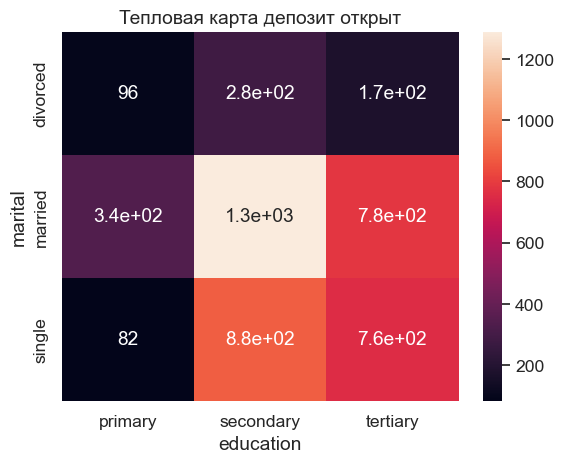

In [179]:
df_1 = df_d1[['marital','education','deposit']]
df_0 = df_d0[['marital','education','deposit']]
heatmap = sns.heatmap(df_1.pivot_table(index='marital', columns='education', values='deposit',aggfunc='count'),annot=True)
heatmap.set_title('Тепловая карта депозит открыт')
plt.show()

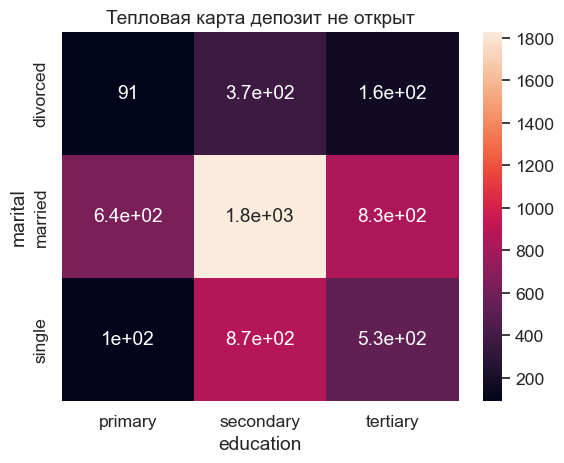

In [180]:
heatmap = sns.heatmap(df_0.pivot_table(index='marital', columns='education', values='deposit',aggfunc='count'),annot=True)
heatmap.set_title('Тепловая карта депозит не открыт')
plt.show()

## Часть 3: преобразование данных

### Задание 1

In [181]:
# преобразуйте уровни образования
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() # кодируем порядковым кодировщиком
education = label_encoder.fit_transform(df['education'])
df['education_coded'] = education

In [194]:
age = label_encoder.fit_transform(df['age_group'])
df['age_group'] = age

Задание 4.1

Найдите сумму получившихся значений для признака education.

In [182]:
df.education_coded.sum()

11995

Задание 4.2

Вычислите стандартное отклонение по преобразованной в корректный вид целевой переменной deposit. Ответ округлите до трёх знаков после точки-разделителя.

In [183]:
df.deposit.std()

0.4986712532451993

### Задания 2 и 3

делаем то же самое для других бинарных переменных, которых у нас три:

+ 'default';
+ 'housing';
+ 'loan'.


Все три мы будем модифицировать ровно так же: для слова yes мы возьмём в качестве значения 1, а для no — 0.

In [184]:
# преобразуйте бинарные переменные в представление из нулей и единиц
df['default'] = df['default'].apply(lambda x: 1 if x=='yes' else 0)
df['housing'] = df['housing'].apply(lambda x: 1 if x=='yes' else 0)
df['loan'] = df['loan'].apply(lambda x: 1 if x=='yes' else 0)


Задание 4.3

Вычислите среднее арифметическое для каждой из получившихся переменных, сложите три результата и в качестве ответа впишите итог, округлив его до трёх знаков после точки-разделителя.

In [134]:
df['default'].mean() + df['housing'].mean() + df['loan'].mean()

0.6354280059376547

Теперь нам необходимо преобразовать номинальные переменные, которые могут принимать несколько различных значений. Это следующие переменные:

+ 'job';
+ 'marital';
+ 'contact';
+ 'month';
+ 'poutcome'.

Создайте для них dummy-переменные и добавьте их в набор данных.

In [189]:
df = pd.get_dummies(df, columns = ['job','marital','contact','month','poutcome'])
#df

### Задание 4

In [195]:
# создайте дамми-переменные
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10105 entries, 0 to 10104
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                10105 non-null  int64  
 1   education          10105 non-null  object 
 2   default            10105 non-null  int64  
 3   balance            10105 non-null  float64
 4   housing            10105 non-null  int64  
 5   loan               10105 non-null  int64  
 6   day                10105 non-null  int64  
 7   duration           10105 non-null  int64  
 8   campaign           10105 non-null  int64  
 9   pdays              10105 non-null  int64  
 10  previous           10105 non-null  int64  
 11  deposit            10105 non-null  int64  
 12  age_group          10105 non-null  int32  
 13  education_coded    10105 non-null  int32  
 14  job_admin.         10105 non-null  bool   
 15  job_blue-collar    10105 non-null  bool   
 16  job_entrepreneur   101

In [196]:
df = df.drop(columns=['education'])

### Задания 5 и 6

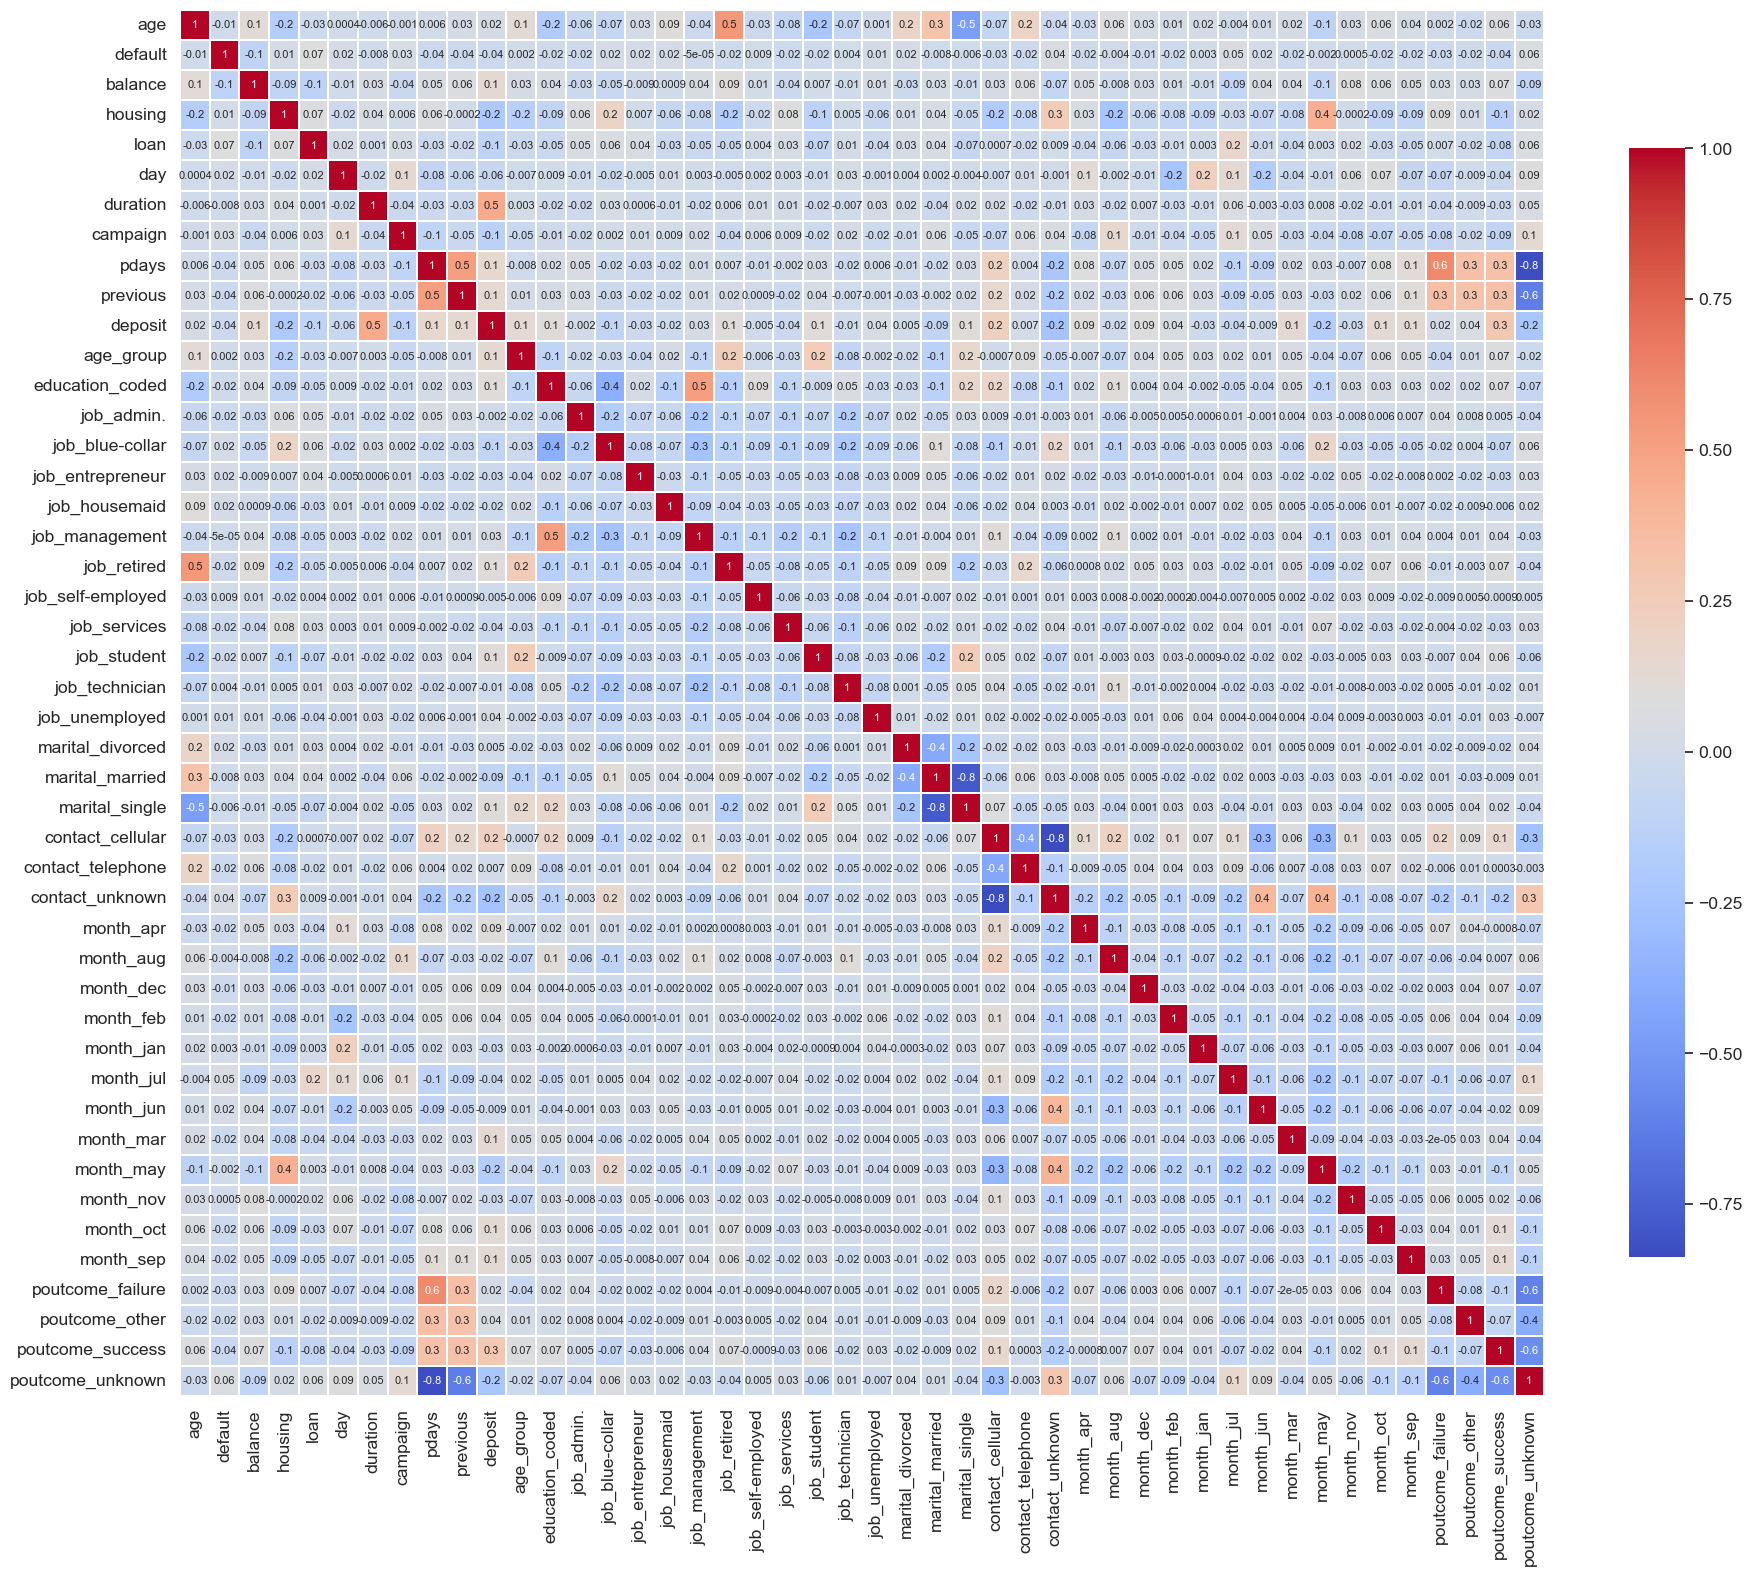

In [221]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
plt.figure(figsize=(22, 18))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt='.1g', annot_kws={"fontsize":8},
            cmap= 'coolwarm', cbar_kws= {'orientation': 'vertical', 'shrink': 0.8})
plt.show('png')

In [231]:
#Вычисляем модуль корреляции
corr_with_target = df.corr()['deposit'].abs().sort_values()
corr_with_target
#Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('deposit')
px.bar(corr_with_target.sort_values(ascending=False),text_auto=True)

### Задания 7 и 8

In [232]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [233]:

print(f'Размер тестовой выборки X_train={X_train.shape}, y_train={y_train.shape[0]}')
print(f'Размер тестовой выборки X_test={X_test.shape}, y_test={y_test.shape[0]}')

Размер тестовой выборки X_train=(6770, 45), y_train=6770
Размер тестовой выборки X_test=(3335, 45), y_test=3335


Задание 4.8

Каково среднее значение целевой переменной на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя.

In [235]:
y_test.mean()

0.46326836581709147

### Задание 9

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.

С помощью SelectKBest отберите 15 признаков, наилучшим образом подходящих для использования в задаче. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_classif.

Помните, что на данном этапе вам необходимо оставить только те признаки, которые содержат лишь числовые значения.

In [241]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков
selector = SelectKBest(score_func = f_classif, k=15)
selector.fit(X_train, y_train)
columns = list(selector.get_feature_names_out())

In [243]:
X_test = X_test[columns]
X_train = X_train[columns]

### Задание 10

In [244]:
# нормализуйте данные с помощью minmaxsxaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Задание 4.10

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из тестовой выборки. Ответ округлите до двух знаков после точки-разделителя.

In [246]:
X_test_scaled.balance.mean()

0.46823674223097866

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

Для начала реализуем самый простой алгоритм, который вам известен — логистическую регрессию. В качестве алгоритма оптимизации будем использовать 'sag', в качестве значения параметра random_state возьмём число 42 и запустим 1000 итераций.

Оцените качество модели на тестовой выборке.

In [252]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   balance           6770 non-null   float64
 1   housing           6770 non-null   float64
 2   duration          6770 non-null   float64
 3   campaign          6770 non-null   float64
 4   pdays             6770 non-null   float64
 5   previous          6770 non-null   float64
 6   age_group         6770 non-null   float64
 7   contact_cellular  6770 non-null   float64
 8   contact_unknown   6770 non-null   float64
 9   month_mar         6770 non-null   float64
 10  month_may         6770 non-null   float64
 11  month_oct         6770 non-null   float64
 12  month_sep         6770 non-null   float64
 13  poutcome_success  6770 non-null   float64
 14  poutcome_unknown  6770 non-null   float64
dtypes: float64(15)
memory usage: 793.5 KB


In [253]:
# обучите логистическую регрессию и рассчитайте метрики качества
from sklearn import linear_model #линейные модели
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(random_state=42, solver='sag', max_iter=1000)
#Обучаем модель, минизируя logloss
log_reg.fit(X_train_scaled, y_train)
#Делаем предсказание класса
y_test_pred = log_reg.predict(X_test_scaled)
y_train_pred = log_reg.predict(X_train_scaled)

In [256]:
print(f'Метрики на тестовых даннных\n {metrics.classification_report(y_test, y_test_pred,digits=3)}')
print(f'Метрики на тренировочных данных\n {metrics.classification_report(y_train, y_train_pred,digits=3)}')

Метрики на тестовых даннных
               precision    recall  f1-score   support

           0      0.790     0.866     0.826      1790
           1      0.825     0.734     0.777      1545

    accuracy                          0.805      3335
   macro avg      0.808     0.800     0.802      3335
weighted avg      0.807     0.805     0.804      3335

Метрики на тренировочных данных
               precision    recall  f1-score   support

           0      0.811     0.878     0.843      3634
           1      0.843     0.762     0.801      3136

    accuracy                          0.824      6770
   macro avg      0.827     0.820     0.822      6770
weighted avg      0.826     0.824     0.823      6770



### Задания 2,3,4

Простой алгоритм обучен. Теперь давайте обучим ещё один алгоритм — решающие деревья. В качестве параметров для начала возьмём следующие:

+ criterion = 'entropy';
+ random_state = 42.

Остальные параметры оставьте по умолчанию.

In [258]:
# обучите решающие деревья, настройте максимальную глубину
tree_model = tree.DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=6)
tree_model.fit(X_train_scaled, y_train)
y_test_pred = tree_model.predict(X_test_scaled)
y_train_pred = tree_model.predict(X_train_scaled)
print(f'Мерики на тестовых даннных\n {metrics.classification_report(y_test, y_test_pred)}')
print(f'Мерики на тренировочных данных\n {metrics.classification_report(y_train, y_train_pred)}')

Мерики на тестовых даннных
               precision    recall  f1-score   support

           0       0.85      0.78      0.81      1790
           1       0.77      0.84      0.80      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.81      0.81      3335
weighted avg       0.81      0.81      0.81      3335

Мерики на тренировочных данных
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      3634
           1       0.78      0.85      0.81      3136

    accuracy                           0.82      6770
   macro avg       0.82      0.82      0.82      6770
weighted avg       0.82      0.82      0.82      6770



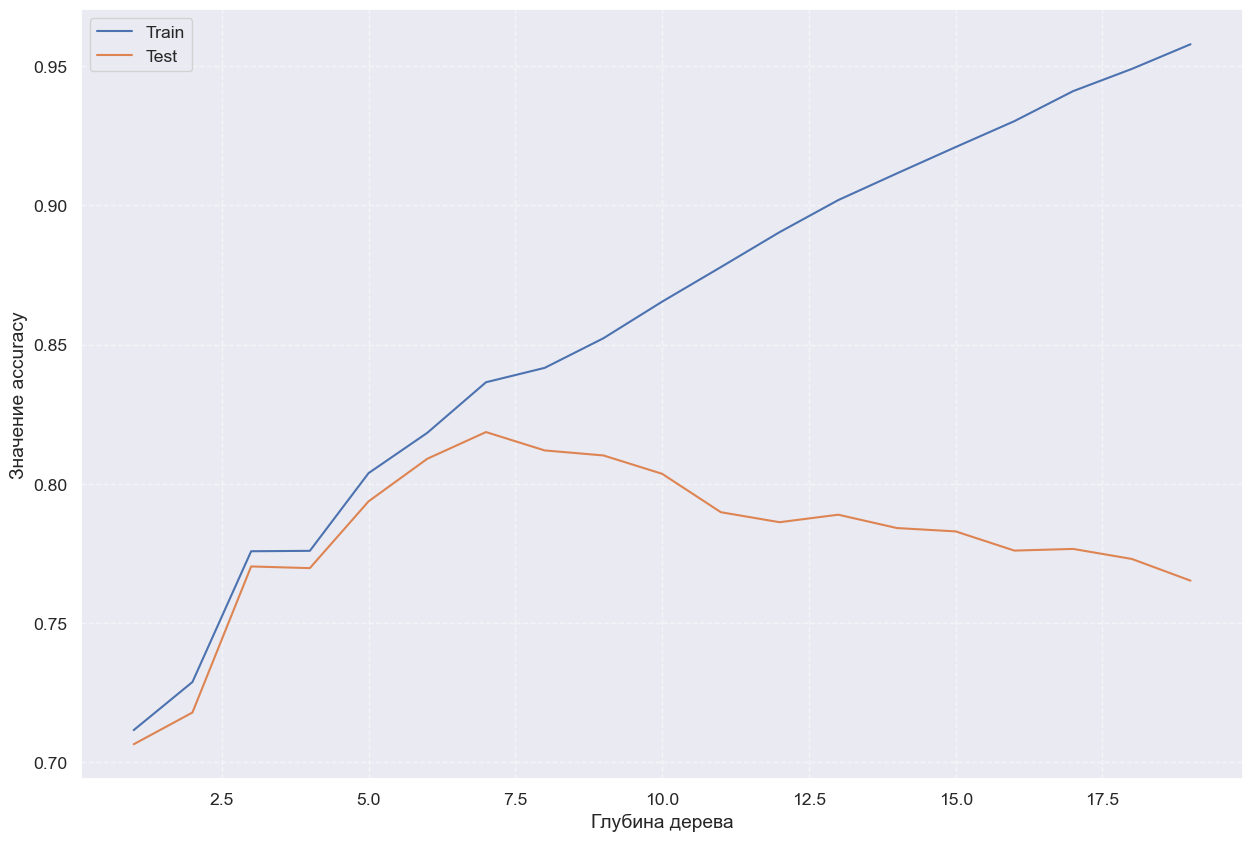

In [269]:
accuracy_test = []
accuracy_train = []
depths = range(1, 20)
for depth in depths:
    dtc = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=depth)
    dtc.fit(X_train_scaled, y_train)
    accuracy_train.append(metrics.accuracy_score(y_train, dtc.predict(X_train_scaled)))
    accuracy_test.append(metrics.accuracy_score(y_test, dtc.predict(X_test_scaled)))
    
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(depths, accuracy_train, label='Train')
ax.plot(depths, accuracy_test, label='Test')
ax.set_xlabel('Глубина дерева')
ax.set_ylabel('Значение accuracy')
#ax.xaxis.set_ticks(depths)
plt.grid(linestyle='--', alpha=0.5)
ax.legend()
plt.show()

### Задание 5

Разумеется, у каждой модели может быть множество параметров. Перебирать их вручную, чтобы получить наилучшее качество, долго и трудозатратно. Поэтому мы можем использовать оптимизацию: можно перебрать сразу большое количество комбинаций различных параметров и выбрать тот вариант, при котором модель будет давать наиболее точный прогноз.

Реализуйте оптимизацию гиперпараметров с помощью GridSearch, перебрав следующие параметры:

'min_samples_split': [2, 5, 7, 10];
'max_depth':[3,5,7].

In [271]:
# подберите оптимальные параметры с помощью gridsearch
from sklearn.model_selection import GridSearchCV
# создадим сетку гиперпараметров
# подберите оптимальные параметры с помощью gridsearch
param_grid = {'min_samples_split': [2, 5, 7, 10] ,
              'max_depth':[3,5,7]
              }
grid_search =  GridSearchCV(
        estimator=tree.DecisionTreeClassifier(
            criterion='entropy', 
            random_state=42
        ), 
    param_grid=param_grid,
     
    n_jobs = -1
)  
%time grid_search.fit(X_train_scaled, y_train) 
print("accuracy на тестовом наборе: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))
y_test_pred = grid_search.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))


CPU times: total: 594 ms
Wall time: 26.6 s
accuracy на тестовом наборе: 0.82
f1_score на тестовом наборе: 0.81
Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_split': 10}


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

Обучите случайный лес со следующими параметрами:

n_estimators = 100;
criterion = 'gini';
min_samples_leaf = 5;
max_depth = 10;
random_state = 42.

### Задание 1

In [273]:
# обучите на ваших данных случайный лес

forest_model = ensemble.RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_leaf=5,
    criterion='gini'
)
forest_model.fit(X_train_scaled, y_train)
y_train_pred = forest_model.predict(X_train_scaled)
y_test_pred = forest_model.predict(X_test_scaled)
print(f'Метрики на тестовых даннных\n {metrics.classification_report(y_test, y_test_pred)}')
print(f'Метрики на тренировочных данных\n {metrics.classification_report(y_train, y_train_pred)}')

Метрики на тестовых даннных
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335

Метрики на тренировочных данных
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      3634
           1       0.84      0.86      0.85      3136

    accuracy                           0.86      6770
   macro avg       0.86      0.86      0.86      6770
weighted avg       0.86      0.86      0.86      6770



### Задания 2 и 3

Дата-сайентист не должен останавливаться на одной модели — он должен пробовать все доступные варианты. Поэтому теперь предлагаем вам сравнить полученные результаты с моделью градиентного бустинга. Используйте градиентный бустинг для решения задачи классификации, задав для него следующие параметры:

+ learning_rate = 0.05;
+ n_estimators = 300;
+ min_samples_leaf = 5;
+ max_depth = 5;
+ random_state = 42.

In [275]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
# обучите на ваших данных случайный лес
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=300,
    random_state=42,
    min_samples_leaf=5,
    learning_rate=0.05,
    max_depth=5         
)

gb.fit(X_train_scaled, y_train)
y_train_pred = gb.predict(X_train_scaled)
y_test_pred = gb.predict(X_test_scaled)
print(f'Мерики на тестовых даннных\n {metrics.classification_report(y_test, y_test_pred)}')
print(f'Мерики на тренировочных данных\n {metrics.classification_report(y_train, y_train_pred)}')

Мерики на тестовых даннных
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335

Мерики на тренировочных данных
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      3634
           1       0.87      0.89      0.88      3136

    accuracy                           0.89      6770
   macro avg       0.89      0.89      0.89      6770
weighted avg       0.89      0.89      0.89      6770



### Задание 4

Вы уже попробовали построить разные модели, и теперь пришло время построить ансамбль из моделей разного типа.

В этом задании вам необходимо использовать стекинг, объединив те алгоритмы, которые вы уже использовали ранее: решающие деревья, логистическую регрессию и градиентный бустинг. В качестве метамодели используйте модель логистической регрессии.

Параметры оставьте те же, что были в ваших алгоритмах в предыдущих заданиях.

In [277]:
# объедините уже известные вам алгоритмы с помощью стекинга
from sklearn.ensemble import StackingClassifier
#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', log_reg),
    ('dt',  tree_model),
    
]

#Создаем объект класса стекинг
steg_model = StackingClassifier(
    estimators=estimators,
    final_estimator=gb)
    

steg_model.fit(X_train_scaled, y_train)
y_train_pred = steg_model.predict(X_train_scaled)
y_test_pred = steg_model.predict(X_test_scaled)
print(f'Метрики на тестовых даннных\n {metrics.classification_report(y_test, y_test_pred)}')
print(f'Метрики на тренировочных данных\n {metrics.classification_report(y_train, y_train_pred)}')

Метрики на тестовых даннных
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1790
           1       0.80      0.81      0.80      1545

    accuracy                           0.82      3335
   macro avg       0.81      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335

Метрики на тренировочных данных
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      3634
           1       0.81      0.84      0.83      3136

    accuracy                           0.84      6770
   macro avg       0.84      0.84      0.84      6770
weighted avg       0.84      0.84      0.84      6770



### Задание 5

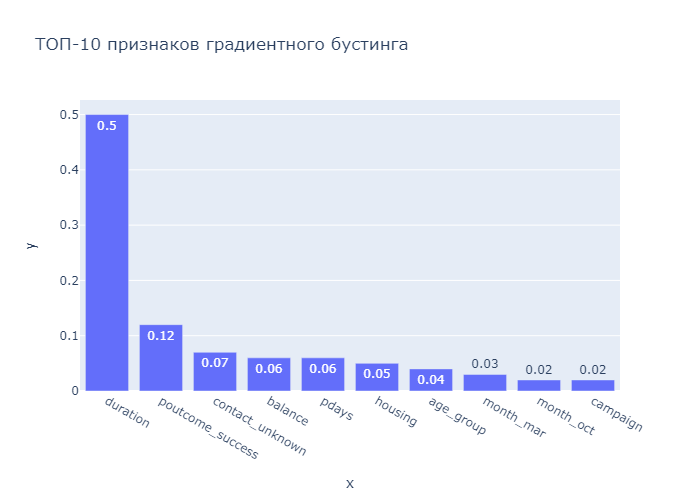

In [278]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга
gb_f = pd.DataFrame([gb.feature_importances_], columns=gb.feature_names_in_)
fig = px.bar(x = list(gb_f.loc[0].sort_values(ascending=False)[0:10].index),
    y=round(gb_f.loc[0].sort_values(ascending=False)[0:10], 2),
    text_auto=True,
    title='ТОП-10 признаков градиентного бустинга'    
)
fig.show('png')

### Задания 6,7,8

Ранее мы уже рассматривали оптимизацию гиперпараметров при помощи GridSearch. Однако вы знаете, что это не единственный способ. Один из более продвинутых вариантов оптимизации гиперпараметров — фреймворк Optuna. Примените его для оптимизации гиперпараметров. Для перебора возьмите случайный лес и следующие параметры:

+ n_estimators = trial.suggest_int('n_estimators', 100, 200, 1);
+ max_depth = trial.suggest_int('max_depth', 10, 30, 1);
+ min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1).

In [279]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna

import optuna
def optuna_rf(trial):
    # задаем пространства поиска гиперпараметров
    n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
    max_depth = trial.suggest_int('max_depth', 10, 30, 1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)
  
    # создаем модель
    model = forest_model
  
    # обучаем модель 
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train)
    score = metrics.f1_score(y_train, y_train_pred)

    return score

In [280]:
#cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=50)

# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42)
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)

score = metrics.f1_score(y_test, y_test_pred)
print(f'Наилучшие значения гиперпараметров {study.best_params}')
print(f'F1 for test data={score:.2f}')
print(f'Accuracy for test data={metrics.accuracy_score(y_test, y_test_pred):.2f}')

[I 2024-03-15 00:16:19,663] A new study created in memory with name: RandomForestClassifier
[I 2024-03-15 00:16:20,546] Trial 0 finished with value: 0.6331516252776096 and parameters: {'n_estimators': 188, 'max_depth': 17, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.6331516252776096.
[I 2024-03-15 00:16:21,381] Trial 1 finished with value: 0.6331516252776096 and parameters: {'n_estimators': 112, 'max_depth': 25, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.6331516252776096.
[I 2024-03-15 00:16:22,049] Trial 2 finished with value: 0.6331516252776096 and parameters: {'n_estimators': 136, 'max_depth': 13, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.6331516252776096.
[I 2024-03-15 00:16:22,718] Trial 3 finished with value: 0.6331516252776096 and parameters: {'n_estimators': 173, 'max_depth': 13, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.6331516252776096.
[I 2024-03-15 00:16:23,366] Trial 4 finished with value: 0.6331516252776096 and parameters: {'n

Наилучшие значения гиперпараметров {'n_estimators': 188, 'max_depth': 17, 'min_samples_leaf': 10}
F1 for test data=0.81
Accuracy for test data=0.82
